In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Live (1).csv")

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df1=df

In [5]:
df1=df1.drop(['status_id','status_published','Column1','Column2','Column3','Column4'],axis=1)

In [6]:
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [7]:
df1['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [8]:
df1['status_type']=df1['status_type'].replace(['photo','video','status','link'],[0,1,2,3])

In [9]:
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,529,512,262,432,92,3,1,1,0
1,0,150,0,0,150,0,0,0,0,0
2,1,227,236,57,204,21,1,1,0,0
3,0,111,0,0,111,0,0,0,0,0
4,0,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,0,89,0,0,89,0,0,0,0,0
7046,0,16,0,0,14,1,0,1,0,0
7047,0,2,0,0,1,1,0,0,0,0
7048,0,351,12,22,349,2,0,0,0,0


In [10]:
df1.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [11]:
df1.dtypes

status_type      int64
num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
dtype: object

In [12]:
#ploting the graph to analyse data...

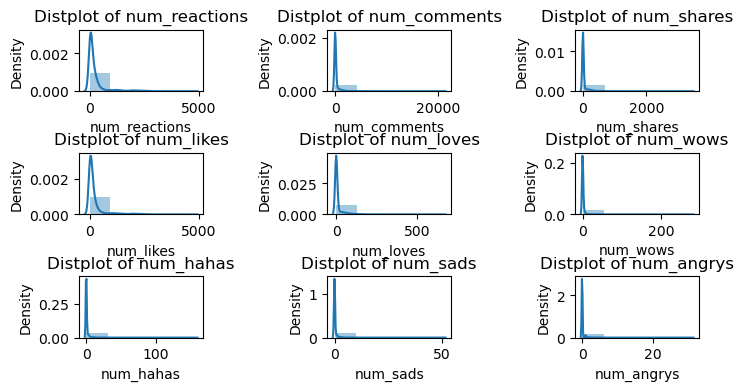

In [20]:
plt.figure(1,figsize=(8,4))
n=0
for x in ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']:
    n +=1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace=1,wspace=1)
    sns.distplot(df1[x], bins=5)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [21]:
#import kmean cluster by sklearn.cluster...

In [22]:
from sklearn.cluster import KMeans

In [24]:
from sklearn.metrics import silhouette_score#useful for detrmining best no of clusters

In [25]:
"""The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.
The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.
The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion."""

'The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.\nThe k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.\nThe K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.'

In [26]:
"""Inertia is not a normalized metric.

The lower values of inertia are better and zero is optimal.

But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

We can calculate model inertia as follows:-"""

'Inertia is not a normalized metric.\n\nThe lower values of inertia are better and zero is optimal.\n\nBut in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).\n\nRunning a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.\n\nWe can calculate model inertia as follows:-'

In [27]:
#now checking _inertia score and accuracy score....

In [28]:
x=df1.iloc[:,-10:]
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,529,512,262,432,92,3,1,1,0
1,0,150,0,0,150,0,0,0,0,0
2,1,227,236,57,204,21,1,1,0,0
3,0,111,0,0,111,0,0,0,0,0
4,0,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,0,89,0,0,89,0,0,0,0,0
7046,0,16,0,0,14,1,0,1,0,0
7047,0,2,0,0,1,1,0,0,0,0
7048,0,351,12,22,349,2,0,0,0,0


In [35]:
km_inertias,km_score=[],[]
for k in range(2,6):
    km=KMeans(n_clusters=k).fit(x)
    km_inertias.append(km.inertia_)
    km_score.append(silhouette_score(x,km.labels_))
    print(f"process with kMeans with k:{k},Inertia={km.inertia_},silhoutte_score={silhouette_score(x,km.labels_)}")

process with kMeans with k:2,Inertia=4986394670.994066,silhoutte_score=0.8721903217647794
process with kMeans with k:3,Inertia=2735260635.847363,silhoutte_score=0.8121397352426442
process with kMeans with k:4,Inertia=2002150980.4144707,silhoutte_score=0.8175605982026312
process with kMeans with k:5,Inertia=1470353241.4805331,silhoutte_score=0.783765154108804


In [36]:
#as you can see kmean with cluster 2 have high accuracy...

In [37]:
#now plot accuarcy with no of clusters(k)..

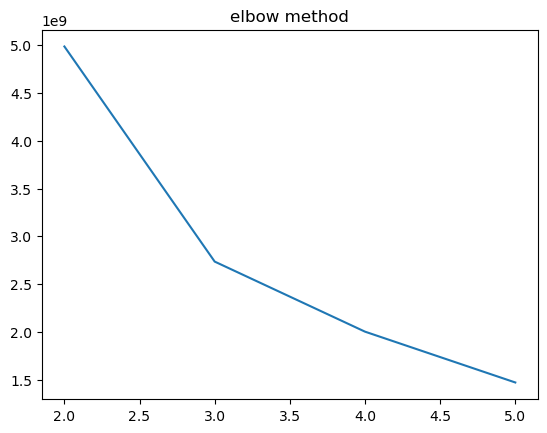

In [38]:
sns.lineplot(range(2,6),km_inertias)
plt.title('elbow method')
plt.show()

In [39]:
#now plotting graph by silhouette score...

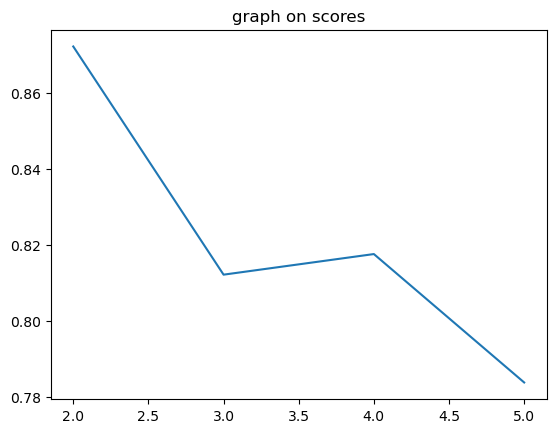

In [40]:
sns.lineplot(range(2,6),km_score)
plt.title("graph on scores")
plt.show()

In [41]:
#both elbow and silhouette score shows 3 as best cluster size...

In [42]:
#build model with 3 clusters...

In [43]:
kmean3=KMeans(n_clusters=3).fit(x)

In [44]:
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,529,512,262,432,92,3,1,1,0
1,0,150,0,0,150,0,0,0,0,0
2,1,227,236,57,204,21,1,1,0,0
3,0,111,0,0,111,0,0,0,0,0
4,0,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,0,89,0,0,89,0,0,0,0,0
7046,0,16,0,0,14,1,0,1,0,0
7047,0,2,0,0,1,1,0,0,0,0
7048,0,351,12,22,349,2,0,0,0,0


In [45]:
x['labels']=kmean3.labels_

In [46]:
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,labels
0,1,529,512,262,432,92,3,1,1,0,2
1,0,150,0,0,150,0,0,0,0,0,2
2,1,227,236,57,204,21,1,1,0,0,2
3,0,111,0,0,111,0,0,0,0,0,2
4,0,213,0,0,204,9,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
7045,0,89,0,0,89,0,0,0,0,0,2
7046,0,16,0,0,14,1,0,1,0,0,2
7047,0,2,0,0,1,1,0,0,0,0,2
7048,0,351,12,22,349,2,0,0,0,0,2


In [48]:
#printing accuracy of 3 cluster model...

In [49]:
accuarcy=silhouette_score(x,kmean3.labels_)

In [50]:
accuarcy

0.812139830633516

In [51]:
print(" for kmean clustering model with 3 clusters accuarcy is ", accuarcy)

 for kmean clustering model with 3 clusters accuarcy is  0.812139830633516
